# Melbourne Housing Prediction

In [102]:
original_data=pd.read_csv('/Users/kavach/Downloads/melb_data.csv')


In [136]:
X=original_data.drop(labels='Price', axis=1)
y=original_data.Price


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42)

In [105]:
X_train.shape, X_test.shape

((10864, 20), (2716, 20))

In [106]:
y_train.shape, y_test.shape

((10864,), (2716,))

In [107]:
y_train

12796    1480000.0
9642     1530000.0
3207      690000.0
1698      570000.0
761      1041000.0
           ...    
5191      851500.0
13418    1400000.0
5390      975000.0
860       722000.0
7270      860000.0
Name: Price, Length: 10864, dtype: float64

In [142]:
print('Rows:',X_train.shape[0])
print('Columns:',X_train.shape[1])
print()

print('Features')
print()
print( X_train.columns.tolist())
print()

print(' Unique Values')
print()
print( X_train.nunique())

Rows: 10864
Columns: 20

Features

['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

 Unique Values

Suburb             306
Address          10726
Rooms                9
Type                 3
Method               5
SellerG            249
Date                58
Distance           198
Postcode           192
Bedroom2            12
Bathroom             9
Car                 10
Landsize          1353
BuildingArea       552
YearBuilt          139
CouncilArea         33
Lattitude         5612
Longtitude        6075
Regionname           8
Propertycount      303
dtype: int64


In [109]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12796,Mount Waverley,37 Pascall St,4,h,S,Jellis,16/09/2017,14.2,3149.0,4.0,2.0,2.0,695.0,160.0,1970.0,NaN,-37.86127,145.14271,Eastern Metropolitan,13366.0
9642,Mount Waverley,23 Baily St,3,h,S,Ray,17/06/2017,14.2,3149.0,3.0,1.0,2.0,810.0,NaN,NaN,Monash,-37.86838,145.14664,Eastern Metropolitan,13366.0
3207,Hawthorn,5/70 Power St,2,u,S,Jellis,25/02/2017,4.6,3122.0,2.0,1.0,1.0,82.0,NaN,NaN,Boroondara,-37.81800,145.02680,Southern Metropolitan,11308.0
1698,Carlton North,24/635 Drummond St,2,u,S,hockingstuart,27/06/2016,3.2,3054.0,2.0,1.0,1.0,0.0,76.0,1975.0,Yarra,-37.79020,144.97000,Northern Metropolitan,3106.0
761,Bentleigh,3 Somers St,4,h,S,Woodards,22/05/2016,13.0,3204.0,4.0,2.0,1.0,292.0,NaN,NaN,Glen Eira,-37.91480,145.02430,Southern Metropolitan,6795.0


In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 12796 to 7270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10814 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   5735 non-null   float64
 14  YearBuilt      6578 non-null   float64
 15  CouncilArea    9774 non-null   object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Reg

In [111]:
X_train.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                50
Landsize            0
BuildingArea     5129
YearBuilt        4286
CouncilArea      1090
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## Plotting Locations on the Map

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

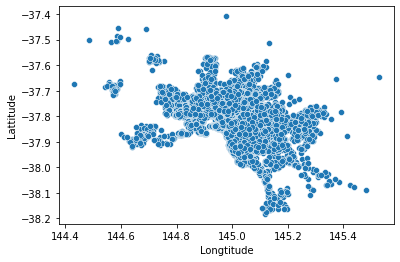

In [112]:
import seaborn as sns

sns.scatterplot(x="Longtitude", y="Lattitude", data=X_train)

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

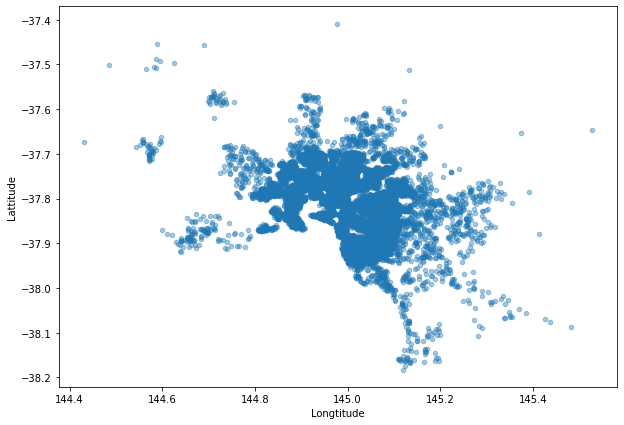

In [113]:
X_train.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.4,
             figsize=(10, 7), cmap=plt.get_cmap('jet'))

## Checking the Correlation Among the Numerical Columns

In [114]:
corr_matrix=original_data.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64

## Creating a Pipeline


For Numerical Values

In [117]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


For Categorical Values

In [118]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

Combining  Numrical & Categorical Values

In [119]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Rooms", "Postcode", "Bedroom2",
               "Bathroom", 'Car', 'Landsize', 'BuildingArea']

cat_attribs = [ "Type", "Method", 'CouncilArea', 'Regionname']

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [120]:
X_train_New = preprocess_pipeline.fit_transform(
    X_train[num_attribs + cat_attribs])

## Model Training


****Linear Regression****

In [121]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train_New, y_train)

### Checking Accuracy 

Using K Cross Validation to Check the Accuracy

In [122]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lin_reg,X_train_New,y_train,cv=10)
print(cv_scores)
print()
print("Accuracy of Your Model is :- \n ",cv_scores.mean())


[ 6.10159669e-01  4.69372301e-01 -5.27379935e+12  5.82332136e-01
  5.17607584e-01  5.44976640e-01  5.94056858e-01 -3.42643270e-01
  5.74960674e-01 -8.96752978e+17]

Accuracy of Your Model is :- 
  -8.967582515961707e+16


## Trying another Algorithm :- Decsion Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor().fit(X_train_New, y_train)
prediction=tree_reg.predict(X_train_New)

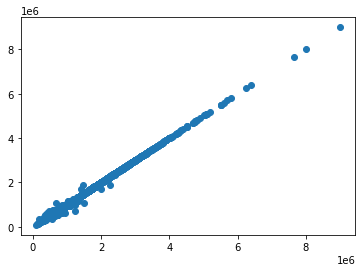

In [124]:
plt.scatter(y_train,prediction)
plt.show()


### Accuracy of the Model :-

In [125]:
from sklearn.model_selection import cross_validate

result=cross_val_score(tree_reg, X_train_New,y_train,cv=10)
print(result)
print()
print("Accuracy of the Model :- \n", result.mean())

[0.61373718 0.52542482 0.49951371 0.39981212 0.43013445 0.58888361
 0.5334662  0.52475452 0.52653231 0.48920003]

Accuracy of the Model :- 
 0.5131458962040094


### Trying More Powerful Algorithm :- RandomForestRegressor

In [126]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor().fit(X_train_New,y_train)

### Accuracy :-

In [127]:
resultForest=cross_val_score(forest_reg, X_train_New, y_train, cv=10)
print(result)
print()
print('Accuracy :- \n', result.mean())

[0.61373718 0.52542482 0.49951371 0.39981212 0.43013445 0.58888361
 0.5334662  0.52475452 0.52653231 0.48920003]

Accuracy :- 
 0.5131458962040094


### Choosing ***DecisonTreegressor*** and now performing  ***HyperParameterTuning***

Performing GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    { 
        'splitter': ['best', 'random'],
        'max_depth':[1,3,5,8,9,11],
        'min_samples_split' :[2,4,6,8,10],
        'min_samples_leaf' : [2,3,4,5,6,7,8,9],
        'max_features' : ['auto', 'sqrt', 'log2']
        }
]

grid_search=GridSearchCV(tree_reg,param_grid,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [129]:
grid_search.fit(X_train_New,y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
[CV 1/3] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=-351759250468.846 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=-344017251222.429 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=-335244565701.492 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-351759250468.846 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-349989239755.047 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=-340584642119.577 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, min_samples_le

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 3, 5, 8, 9, 11],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'splitter': ['best', 'random']}],
             scoring='neg_mean_squared_error', verbose=3)

In [130]:
grid_search.best_params_

{'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'random'}

In [131]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(
    max_depth=11, max_features='auto',min_samples_leaf=9,min_samples_split=10,splitter='random').fit(X_train_New, y_train)

In [132]:
result = cross_val_score(tree_reg, X_train_New, y_train, cv=10)
print(result)
print()
print("Accuracy of the Model :- \n", result.mean())


[0.65976857 0.50758711 0.63599956 0.63625682 0.61285684 0.6183132
 0.66540692 0.6254625  0.62608821 0.65407979]

Accuracy of the Model :- 
 0.6241819509055033


## We have improved the accuracy of the model

## Testing our Model on the Test Set 

In [134]:
final_model=grid_search.best_estimator_

X_test_prepared= preprocess_pipeline.transform(
    X_test[num_attribs + cat_attribs])

### Checking the Accuracy on the Test Set

In [135]:
results=cross_val_score(final_model,X_test_prepared,y_test, cv=10)
print(results)
print()
print('Accuracy of the Model is :- \n', results.mean())

[0.53787311 0.67830966 0.5448392  0.68306593 0.63036725 0.5802344
 0.68282879 0.62954296 0.58713458 0.571905  ]

Accuracy of the Model is :- 
 0.6126100880252203
